# 产生数据

In [1]:
import numpy as np

In [2]:
min = 1
max = 10
X = np.arange(min,max,(max-min)/100)
X.shape

(100,)

In [3]:
y = np.sin(X)+np.random.randn(100)*0.1

In [4]:
y

array([ 1.01570593,  0.8926039 ,  0.92724773,  1.03798324,  1.13270945,
        1.06937847,  0.98215452,  1.01512818,  1.09146184,  0.86764042,
        0.92648386,  0.91951956,  0.93844197,  0.79184074,  0.65580942,
        0.66820125,  0.86238786,  0.66342628,  0.53105061,  0.36618636,
        0.50747794,  0.30124783,  0.25048446,  0.0407102 ,  0.1011107 ,
       -0.06693735, -0.26698154, -0.29176804, -0.43188765, -0.334168  ,
       -0.60862495, -0.59134886, -0.6881797 , -0.87847525, -0.81387272,
       -0.84522578, -0.70870656, -0.78612788, -0.90729167, -0.974121  ,
       -0.97845274, -0.9675168 , -0.98824017, -0.97801015, -1.16442196,
       -0.90416193, -0.78695016, -0.80396526, -0.88040875, -0.79759011,
       -0.77607608, -0.69417631, -0.40053701, -0.39354455, -0.50649957,
       -0.28338512, -0.2432697 , -0.12830465, -0.01522579, -0.01424395,
       -0.00524142,  0.17061549,  0.16457364,  0.42577062,  0.28269512,
        0.64502377,  0.68832704,  0.60061605,  0.80027765,  0.87

In [5]:
X = X[:,np.newaxis]

In [6]:
import matplotlib.pyplot as plt

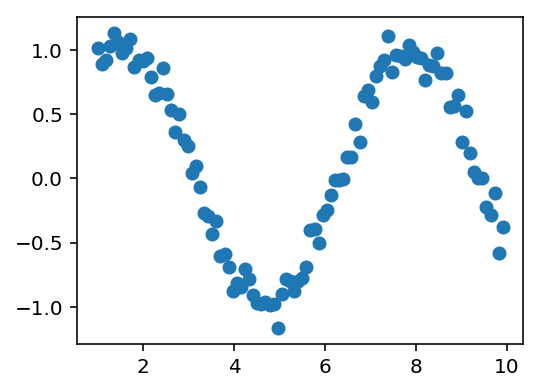

In [7]:
plt.figure(figsize=(4,3),dpi=144)
plt.scatter(X[:,0],y)

# 创建模型

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [20]:
def model(degree=2):
    linearregression = LinearRegression(normalize=True)
    polynomialfeature = PolynomialFeatures(degree)
    clf = Pipeline([('polynomialfeature',polynomialfeature),('linearregression',linearregression)])
    return clf

In [21]:
model1 = model(1)
model2 = model(2)
model3 = model(3)

# 拟合数据

In [22]:
model1.fit(X,y)
model2.fit(X,y)
model3.fit(X,y)

Pipeline(memory=None,
     steps=[('polynomialfeature', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))])

In [23]:
predict_y1 = model1.predict(X)
predict_y2 = model2.predict(X)
predict_y3 = model3.predict(X)

In [24]:
a = model1.score(X,y)
b = model2.score(X,y)
c = model3.score(X,y)
print(a,b,c)

0.000394220742479523 0.26894234188144117 0.6571134246496083


# 显示

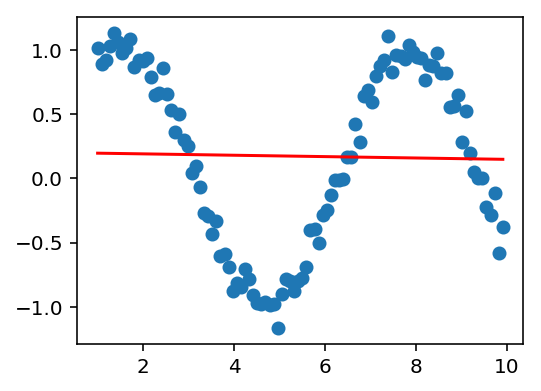

In [25]:
plt.figure(figsize=(4,3),dpi=144)
plt.scatter(X[:,0],y)
plt.plot(X[:,0],predict_y1,c='red')

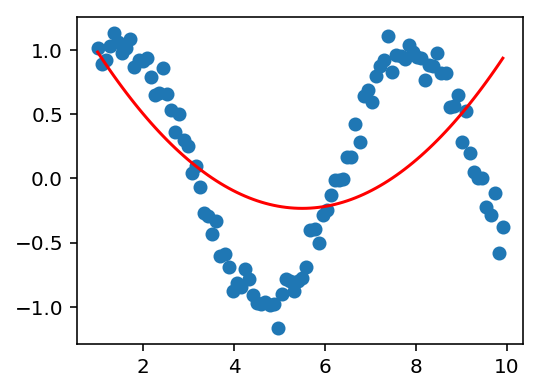

In [26]:
plt.figure(figsize=(4,3),dpi=144)
plt.scatter(X[:,0],y)
plt.plot(X[:,0],predict_y2,c='red')

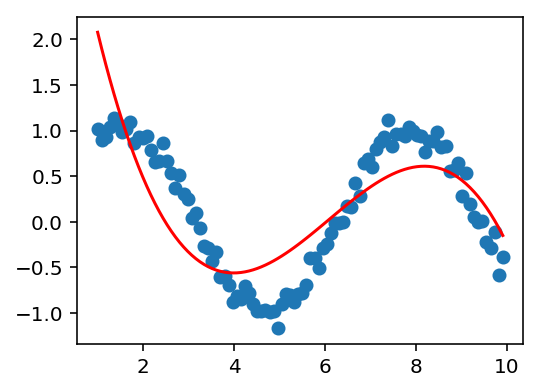

In [27]:
plt.figure(figsize=(4,3),dpi=144)
plt.scatter(X[:,0],y)
plt.plot(X[:,0],predict_y3,c='red')

2 0.26894234188144117
5 0.9661388665933553
10 0.9828291938955641
14 0.9837281404144176
100 0.9884099354550353
1 0.000394220742479523
7 0.9827361457403938


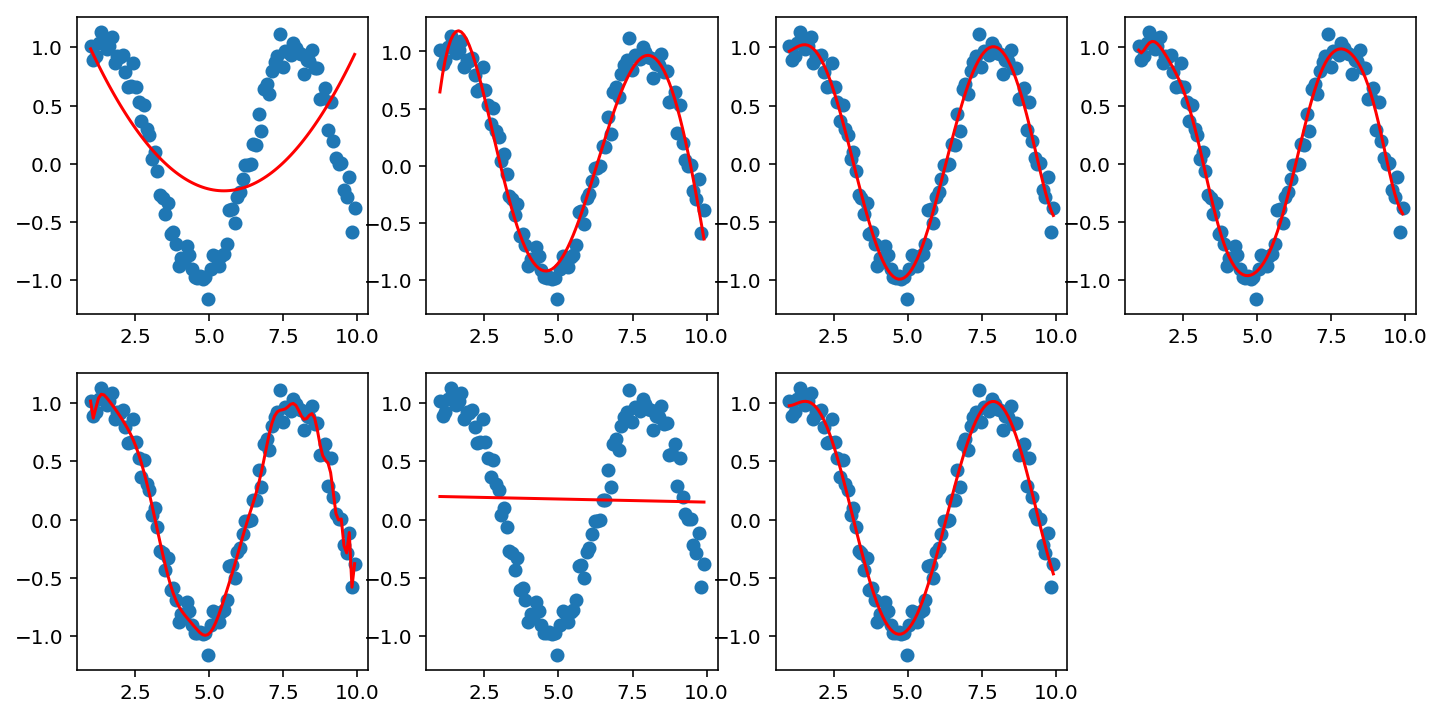

In [42]:
plt.figure(figsize=(12,6),dpi=144)
degrees = [2,5,10,14,100,1,7]
for i in range(len(degrees)):
    model1 = model(degrees[i])
    model1.fit(X,y)
    score1 = model1.score(X,y)
    print(degrees[i],score1)
    predict_y = model1.predict(X)
    fig = plt.subplot(2,len(degrees)//2+1,i+1)
    plt.scatter(X[:,0],y)
    plt.plot(X[:,0],predict_y,c='red')